## Clustering asthma-related papers

### Introduction
In this project, we explore the relationship between asthma and coronaviruses. What are the most popular topics the research community is focuses on, before and after the COVID-19 outbreak? Are the areas of interest around asthma and coronaviruses the same before and after the appearance of SARS-CoV-2? The relationship between respiratory disorders and SARS-CoV-2 infection and has been broadly studied in a molecular, clinical and epidiomiological level, but remains still a controversial subject. More details about this relationship can be found here:

In this project we cluster scientific publications in the topic of asthma and coronaviruses.Clustering is performed using NLP techniques and is based in the most frequent words apppering in the papers. Two groups of clusters are created, one for papers published before and one for papers published after the COVID-19 outbreak. For the two periods of times, clustering aims at identifying popular research topics and finding potential gaps in research between asthma and the new coronavirus.

### Data
In response to the COVID-19 pandemic a large database, the COVID-19 Open Research Dataset (CORD-19), was created and has been made publicly available. CORD-19 is a resource of hundreds of thousands scholarly articles, about COVID-19, SARS-CoV-2, and related coronaviruses.
More information about this open source can be found here:
https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

### Data processing

For this project, we select only those papers where the word "asthma" appears at least once in their abstract. This data is found in "asthma_data" csv file. In this analysis, we only consider papers written in English language. We take December 2019 as the point where papers about SARS-CoV-2 started to be published. According to this date, we divide our data as "Before COVID-19" and "After COVID-19" entries.The following analysis is then the same for these 2 groups of papers:

Using Python's NLTK we perfom tokenization and then stemming of the papers' abstract text. With Scikit-learn’s Tfidf Vectorizer, tokens are transformed into to a matrix of TF-IDF features. These TF-IDF features are then catogorized into clusters with the use of Kmeans algorithm. Finally, the PCA algorithm is used for dimensionality reduction and vizualisation of clustering in a 2-dimensional space.

### Loading libraries

In [268]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd

In [193]:
import nltk
import string
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from langdetect import detect

In [194]:
import plotly.express as px
import seaborn as sns

In [195]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


In [196]:
spacy_stop_words = ['whence', 'here', 'show', 'were', 'why', 'n’t', 'the', 'whereupon', 'not', 'more', 'how', 'eight', 'indeed', 'i', 'only', 'via', 'nine', 're', 'themselves', 'almost', 'to', 'already', 'front', 'least', 'becomes', 'thereby', 'doing', 'her', 'together', 'be', 'often', 'then', 'quite', 'less', 'many', 'they', 'ourselves', 'take', 'its', 'yours', 'each', 'would', 'may', 'namely', 'do', 'whose', 'whether', 'side', 'both', 'what', 'between', 'toward', 'our', 'whereby', "'m", 'formerly', 'myself', 'had', 'really', 'call', 'keep', "'re", 'hereupon', 'can', 'their', 'eleven', '’m', 'even', 'around', 'twenty', 'mostly', 'did', 'at', 'an', 'seems', 'serious', 'against', "n't", 'except', 'has', 'five', 'he', 'last', '‘ve', 'because', 'we', 'himself', 'yet', 'something', 'somehow', '‘m', 'towards', 'his', 'six', 'anywhere', 'us', '‘d', 'thru', 'thus', 'which', 'everything', 'become', 'herein', 'one', 'in', 'although', 'sometime', 'give', 'cannot', 'besides', 'across', 'noone', 'ever', 'that', 'over', 'among', 'during', 'however', 'when', 'sometimes', 'still', 'seemed', 'get', "'ve", 'him', 'with', 'part', 'beyond', 'everyone', 'same', 'this', 'latterly', 'no', 'regarding', 'elsewhere', 'others', 'moreover', 'else', 'back', 'alone', 'somewhere', 'are', 'will', 'beforehand', 'ten', 'very', 'most', 'three', 'former', '’re', 'otherwise', 'several', 'also', 'whatever', 'am', 'becoming', 'beside', '’s', 'nothing', 'some', 'since', 'thence', 'anyway', 'out', 'up', 'well', 'it', 'various', 'four', 'top', '‘s', 'than', 'under', 'might', 'could', 'by', 'too', 'and', 'whom', '‘ll', 'say', 'therefore', "'s", 'other', 'throughout', 'became', 'your', 'put', 'per', "'ll", 'fifteen', 'must', 'before', 'whenever', 'anyone', 'without', 'does', 'was', 'where', 'thereafter', "'d", 'another', 'yourselves', 'n‘t', 'see', 'go', 'wherever', 'just', 'seeming', 'hence', 'full', 'whereafter', 'bottom', 'whole', 'own', 'empty', 'due', 'behind', 'while', 'onto', 'wherein', 'off', 'again', 'a', 'two', 'above', 'therein', 'sixty', 'those', 'whereas', 'using', 'latter', 'used', 'my', 'herself', 'hers', 'or', 'neither', 'forty', 'thereupon', 'now', 'after', 'yourself', 'whither', 'rather', 'once', 'from', 'until', 'anything', 'few', 'into', 'such', 'being', 'make', 'mine', 'please', 'along', 'hundred', 'should', 'below', 'third', 'unless', 'upon', 'perhaps', 'ours', 'but', 'never', 'whoever', 'fifty', 'any', 'all', 'nobody', 'there', 'have', 'anyhow', 'of', 'seem', 'down', 'is', 'every', '’ll', 'much', 'none', 'further', 'me', 'who', 'nevertheless', 'about', 'everywhere', 'name', 'enough', '’d', 'next', 'meanwhile', 'though', 'through', 'on', 'first', 'been', 'hereby', 'if', 'move', 'so', 'either', 'amongst', 'for', 'twelve', 'nor', 'she', 'always', 'these', 'as', '’ve', 'amount', '‘re', 'someone', 'afterwards', 'you', 'nowhere', 'itself', 'done', 'hereafter', 'within', 'made', 'ca', 'them']

In [262]:
# extending the list of stopwords taken into account
stop_words.extend(spacy_stop_words)


### Data overview

In [198]:
#We load the csv file to pands dataframe and have a look at the papers' metadata we'll use
asthma_df = pd.read_csv("asthma_data.csv")
asthma_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower
0,qva0jt86,4ba79e54ecf81b30b56461a6aec2094eaf7b7f06,PMC,Relevance of human metapneumovirus in exacerba...,10.1186/1465-9921-6-150,PMC1334186,16371156.0,cc-by,BACKGROUND AND METHODS: Human metapneumovirus ...,2005-12-21,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/4ba79e54ecf81b30b5646...,document_parses/pmc_json/PMC1334186.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,background and methods: human metapneumovirus ...,relevance of human metapneumovirus in exacerba...
1,chz8luni,d68d71553d3a31381c0c3851351f912a9a7be1c9,PMC,Surfactant therapy for acute respiratory failu...,10.1186/cc5944,PMC2206432,17573963.0,cc-by,INTRODUCTION: Exogenous surfactant is used to ...,2007-06-15,...,Crit Care,NaN,NaN,NaN,document_parses/pdf_json/d68d71553d3a31381c0c3...,document_parses/pmc_json/PMC2206432.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,introduction: exogenous surfactant is used to ...,surfactant therapy for acute respiratory failu...
2,3zh8jmc2,fe2000f280297c40bc53ce95d703a9ca6aac19fd,PMC,Differential Regulation of Type I Interferon a...,10.1371/journal.ppat.1000587,PMC2736567,19806178.0,cc-by,A number of paramyxoviruses are responsible fo...,2009-09-18,...,PLoS Pathog,NaN,NaN,NaN,document_parses/pdf_json/fe2000f280297c40bc53c...,document_parses/pmc_json/PMC2736567.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,a number of paramyxoviruses are responsible fo...,differential regulation of type i interferon a...
3,7p3b6tyf,3ccbd07ee1865e4f2afffdb6cc8b6039ab605ee7,PMC,The Tennessee Children's Respiratory Initiativ...,10.1111/j.1440-1843.2010.01743.x,PMC2992986,20409023.0,no-cc,Background and objective: The ‘attack rate’ of...,2010-04-08,...,Respirology,NaN,NaN,NaN,document_parses/pdf_json/3ccbd07ee1865e4f2afff...,document_parses/pmc_json/PMC2992986.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,background and objective: the ‘attack rate’ of...,the tennessee children's respiratory initiativ...
4,xrsyj1tc,fa88fbb8716e5fca7d513bcb5a0a608456a59205,PMC,Analysing the eosinophil cationic protein - a ...,10.1186/1465-9921-12-10,PMC3030543,21235798.0,cc-by,Eosinophil granulocytes reside in respiratory ...,2011-01-14,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/fa88fbb8716e5fca7d513...,document_parses/pmc_json/PMC3030543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,eosinophil granulocytes reside in respiratory ...,analysing the eosinophil cationic protein - a ...


There are 2567 papers containing the word "asthma", among the coronavirus-related publications 

In [199]:
asthma_df.shape

(2567, 21)

In [263]:
# We use the langdetect google library to dect the language of the "abstract" column in our dataframe

asthma_df["lang_detect"] = asthma_df["abstract"].apply(detect)

In [264]:
# As non-english papers are a small percent of our total papers, weexclude them from our analysis

asthma_df["lang_detect"].value_counts()

en    2527
es       2
pt       1
de       1
fr       1
Name: lang_detect, dtype: int64

We now have 2528 papers in total, written in english.

In [202]:
asthma_df = asthma_df.loc[asthma_df['lang_detect'] == "en"]
asthma_df.shape

(2532, 22)

In [266]:
asthma_after_covid['source_x'].value_counts()

WHO                              692
Medline; PMC                     302
Medline                          221
Elsevier; Medline; PMC           124
MedRxiv; WHO                      62
PMC                               60
Elsevier; PMC                     10
BioRxiv; WHO                       7
ArXiv                              6
MedRxiv                            6
BioRxiv                            5
MedRxiv; Medline; WHO              4
Medline; PMC; WHO                  4
MedRxiv; Medline; PMC; WHO         3
Elsevier; Medline; PMC; WHO        2
PMC; WHO                           1
ArXiv; Elsevier; Medline; PMC      1
Name: source_x, dtype: int64

We divide the papers between those published before the new coronavirus SARS-CoV-2 has appeared and those published after the COVID-19 outbreak. We pick December 2019 as the cut-off date.

In [204]:
asthma_before_covid = asthma_df.loc[asthma_df['publish_time']<"2019-12-01"].reset_index(drop=True)
asthma_after_covid = asthma_df.loc[asthma_df['publish_time']>="2019-12-01"].reset_index(drop=True)

We can also have a look at the number of the papers published by month, since the covid outbreak. 

In [205]:
asthma_after_covid['publish_time_new'] =  pd.to_datetime(asthma_after_covid['publish_time'])

In [206]:
asthma_after_covid['publish_month_year'] = pd.to_datetime(asthma_after_covid['publish_time']).dt.to_period('M')
asthma_after_covid.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower,lang_detect,publish_time_new,publish_month_year
0,3ki0dzwb,71b8c50ee0e1f4e79e6618301b768befbf943a5d,PMC,Inflammatory and microbiological associations ...,10.1183/23120541.00267-2019,PMC6983494,32010717.0,cc-by-nc,Patients with near-fatal asthma requiring ECMO...,2020-01-27,...,NaN,document_parses/pdf_json/71b8c50ee0e1f4e79e661...,document_parses/pmc_json/PMC6983494.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,patients with near-fatal asthma requiring ecmo...,inflammatory and microbiological associations ...,en,2020-01-27,2020-01
1,okc7wf4n,f4edbfd3e9a8b2d0d76378e6588a5971b070a4c9,PMC,Different effects of acetyl-CoA carboxylase in...,10.1007/s43440-019-00027-8,PMC7223088,32048254.0,no-cc,BACKGROUND AND OBJECTIVE: Acetyl CoA carboxyla...,2020-01-08,...,NaN,document_parses/pdf_json/f4edbfd3e9a8b2d0d7637...,document_parses/pmc_json/PMC7223088.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,background and objective: acetyl coa carboxyla...,different effects of acetyl-coa carboxylase in...,en,2020-01-08,2020-01
2,8lqjl0ee,1f6fa8e138abc1556e853c53dcce8f5e16007fcc,PMC,Risk of Readmission and Mortality Following Ho...,10.1007/s00408-019-00300-w,PMC7223622,31828514.0,no-cc,PURPOSE: Hypercapnic respiratory failure (HRF)...,2019-12-11,...,NaN,document_parses/pdf_json/1f6fa8e138abc1556e853...,document_parses/pmc_json/PMC7223622.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,purpose: hypercapnic respiratory failure (hrf)...,risk of readmission and mortality following ho...,en,2019-12-11,2019-12
3,vosu7y6j,6fa9233f054f4bbb31972e05c1478b0ec83ccc16,PMC,Innate Type 2 Responses to Respiratory Syncyti...,10.3390/v12050521,PMC7290766,32397226.0,cc-by,Respiratory syncytial virus (RSV) is a common ...,2020-05-08,...,NaN,document_parses/pdf_json/6fa9233f054f4bbb31972...,document_parses/pmc_json/PMC7290766.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,respiratory syncytial virus (rsv) is a common ...,innate type 2 responses to respiratory syncyti...,en,2020-05-08,2020-05
4,yyw64g9w,8d634bba632c08e7d8e105a66dac4e0d813ab4e9,PMC,From Mouse to Man and Back: Closing the Correl...,10.3390/diagnostics10090636,PMC7554749,32859103.0,cc-by,"Lung diseases such as fibrosis, asthma, cystic...",2020-08-26,...,NaN,document_parses/pdf_json/8d634bba632c08e7d8e10...,document_parses/pmc_json/PMC7554749.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,"lung diseases such as fibrosis, asthma, cystic...",from mouse to man and back: closing the correl...,en,2020-08-26,2020-08


In [207]:
asthma_after_covid = asthma_after_covid.sort_values('publish_month_year')

In [208]:
dates = asthma_after_covid["publish_month_year"].value_counts()

In [209]:
dates_df = dates.to_frame().reset_index()

In [210]:
dates_df = dates_df.sort_values("index")
dates_df

,index,publish_month_year
12,2019-12,10
0,2020-01,604
13,2020-02,9
14,2020-03,8
11,2020-04,19
8,2020-05,69
7,2020-06,74
3,2020-07,92
9,2020-08,60
4,2020-09,90


The graph below illustrates the number of papers published through the last 12-14 months. However, we recognize that the two picks noticed in January 2020 and January 2021 are not completely accurate. As an amount of papers had only the year (yyyy) mentioned in their publication date, their publivcation date is taken as 01/01/yyyy.

As a result, we cannot draw a very accurate example of the distribution of publications through the months.

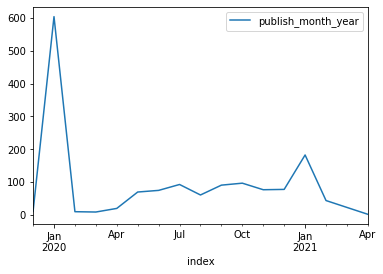

In [211]:
dates_df.plot(x ='index', y = 'publish_month_year')

## Clustering

In [212]:
texts_before = asthma_before_covid["abstract_lower"].tolist()

In [237]:
def custom_tokenizer(str_input):
    
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(str_input)
    words = [word for word in words if word.lower() not in stop_words]

    words = [word.replace('â¡', '') for word in words]
    words = [word.replace('â¢', '') for word in words]
    words = [word.replace('â£', '') for word in words]
    
    words = [''.join(c for c in word if c not in string.punctuation+'©±×≤≥●＜--“”→„') for word in words]
    words = [word for word in words if word not in ['‘', '’', '„']]
        
    words = [word for word in words if word]
    words = [word for word in words if not any(char.isdigit() for char in word)]
    
    words = [stemmer.stem(word) for word in words]
    return words

In [267]:
custom_tokenizer(string_test)

['wilson',
 'tour',
 'tenni',
 'racket',
 'wilson',
 'tour',
 'tenni',
 'racket',
 'fantast',
 'choic',
 'new',
 'starter',
 'sport',
 'lightweight',
 'frame',
 'allow',
 'easi',
 'swing',
 'grip',
 'handl',
 'promot',
 'comfort',
 'feel',
 'assist',
 'control',
 'shot']

In [240]:
vec_before = TfidfVectorizer(min_df=5,tokenizer=custom_tokenizer,
                             max_features=2000,
                      stop_words='english')
matrix_before = vec_before.fit_transform(texts_before)
df_before = pd.DataFrame(matrix_before.toarray(), columns=vec_before.get_feature_names())
df_before.head()

c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



,aberr,abil,abl,abnorm,absenc,absent,absolut,absorpt,abstract,abund,...,x,xray,year,yield,young,younger,yr,α,β,–
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.040192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.035602,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For more information about the useof Kmeans in clustering: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [241]:
number_of_clusters=10
km_before = KMeans(n_clusters=number_of_clusters)
km_before.fit(matrix_before)

KMeans(n_clusters=10)

Let's have an over view of our cluster's centers (centroids) and labels. After that, we get the top terms for every cluster. In other words, we see which are the most frequently mentioned words per cluster. Note: since we have used Stemming, we only have the root of the words now.

In [242]:
centroids_before, labels_before = km_before.cluster_centers_, km_before.labels_
print(centroids_before)
print(labels_before)

[[0.         0.         0.         ... 0.         0.00164773 0.        ]
 [0.         0.00666311 0.00329021 ... 0.0019215  0.00149485 0.00321915]
 [0.00169883 0.0015633  0.00315034 ... 0.00248494 0.00258665 0.00786113]
 ...
 [0.00111985 0.00470508 0.0010242  ... 0.00325038 0.00776988 0.00099006]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00499513 0.00257699 ... 0.         0.         0.        ]]
[5 4 7 ... 6 6 8]


In [243]:
print("Top terms per cluster:")
order_centroids_before = km_before.cluster_centers_.argsort()[:, ::-1]
terms = vec_before.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids_before[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: infant bronchiol respiratori infect rsv sever viral ill acut tract asthma p children studi risk associ year develop caus common
Cluster 1: exacerb asthma infect respiratori viral virus review develop diseas associ role viru caus trigger factor mechan rhinoviru respons human airway
Cluster 2: copd pulmonari diseas chronic cough acut lung patient obstruct exacerb respiratori airway asthma caus fibrosi infect bronchiti treatment therapi review
Cluster 3: cell airway infect respons mice express inflamm epitheli viru asthma increas viral rv immun exacerb respiratori bronchial induc cytokin rsv
Cluster 4: p asthma patient exacerb day level subject viral group children infect symptom cold increas asthmat significantli control studi acut serum
Cluster 5: children patient respiratori infect detect influenza pneumonia hospit viru hmpv virus exacerb asthma clinic sampl rhinoviru viral year pathogen case
Cluster 6: asthma patient health diseas studi risk use effec

In [244]:
order_centroids_before
#word with index 1049 has highest Tfidf value in the first array

array([[ 899,  230, 1576, ..., 1142, 1146,    0],
       [ 648,  149,  900, ..., 1090, 1092,    0],
       [ 405, 1470,  527, ..., 1221, 1225, 1709],
       ...,
       [ 527,  270, 1041, ...,  420, 1485,  886],
       [1972,  293, 1522, ..., 1130, 1131,    0],
       [ 824,  827,  900, ..., 1151, 1152,    0]], dtype=int64)

For more information about PCA and its implementation in Python:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [245]:
T = preprocessing.Normalizer().fit_transform(df_before)
# Dimesionality reduction to 2
pca_model = PCA(n_components=2)
pca_model.fit(T) 
T = pca_model.transform(T) 

# transform the 'centroids of KMeans'

centroid_pca = pca_model.transform(centroids_before)


In [246]:
asthma_before_covid['labels'] = km_before.labels_
asthma_before_covid['pca_1'] = T[:, 0]
asthma_before_covid['pca_2'] = T[:, 1]

In [247]:
asthma_before_covid['labels'] = asthma_before_covid['labels'].astype(str)

In [248]:
fig = px.scatter(asthma_before_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="labels",
                 hover_data=['title'])

In [249]:
fig.show()

#### After covid-19

In [250]:
texts_after = asthma_after_covid["abstract_lower"].tolist()

In [251]:
vec_after = TfidfVectorizer(tokenizer=custom_tokenizer,
                      stop_words='english', 
                           max_features=1000)
matrix_after = vec_after.fit_transform(texts_after)
df_after = pd.DataFrame(matrix_after.toarray(), columns=vec_after.get_feature_names())


c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



In [252]:
df_after.head()

,abil,abl,abnorm,absenc,abstract,access,accord,account,accumul,achiev,...,world,worldwid,wors,worsen,wuhan,year,york,young,younger,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.076389,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [253]:
number_of_clusters=10
km_after = KMeans(n_clusters=number_of_clusters)
km_after.fit(matrix_after)
km_after.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [254]:
centroids_after, labels_after = km_after.cluster_centers_, km_after.labels_
print(centroids_after)
print(labels_after)

[[0.         0.0038928  0.         ... 0.         0.00442885 0.        ]
 [0.         0.00548453 0.         ... 0.         0.         0.        ]
 [0.00523804 0.0030289  0.         ... 0.00565397 0.         0.        ]
 ...
 [0.00319743 0.00449755 0.00567668 ... 0.00552761 0.0014613  0.        ]
 [0.0016708  0.         0.00776244 ... 0.01046418 0.02043762 0.01217497]
 [0.00236335 0.00088484 0.00627414 ... 0.00373696 0.0053471  0.        ]]
[7 3 6 ... 0 0 7]


In [255]:
print("Top terms per cluster:")
order_centroids_after = km_after.cluster_centers_.argsort()[:, ::-1]
terms = vec_after.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids_after[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: visit ed pediatr april telemedicin vs admiss patient emerg hospit depart decreas asthma studi rti pandem compar virtual tract rate
Cluster 1: air pollut health lockdown exposur human qualiti particul impact reduc citi matter econom asthma environment effect level benefit associ hospit
Cluster 2: patient asthma biolog allergi pandem care allerg recommend sever diseas risk manag infect treatment corticosteroid inhal provid therapi medic telemedicin
Cluster 3: cell express airway lung diseas gene inflamm protein immun asthma activ infect receptor role target inflammatori function epitheli respons pulmonari
Cluster 4: patient hospit sever asthma clinic comorbid studi symptom age diseas p group test day outcom year case posit receiv vs
Cluster 5: health diseas risk individu condit peopl popul preval asthma depress social measur pandem factor cancer impact mental anxieti sever patient
Cluster 6: ci patient p risk hospit diseas mortal associ age icu asthma co

In [256]:
order_centroids_after

array([[976, 284, 639, ..., 543, 540,   0],
       [ 36, 664, 388, ..., 543, 539,   0],
       [635,  76, 103, ..., 139, 909, 999],
       ...,
       [276, 936, 635, ..., 440, 455, 999],
       [142,  76, 442, ..., 692, 694, 310],
       [263, 780, 197, ..., 336, 770, 999]], dtype=int64)

In [257]:
T_after = preprocessing.Normalizer().fit_transform(df_after)
# Dimesionality reduction to 2
pca_model = PCA(n_components=2)
pca_model.fit(T_after) 
T_after = pca_model.transform(T_after) 

centroid_pca_after = pca_model.transform(centroids_after)

In [258]:
asthma_after_covid['labels'] = km_after.labels_
asthma_after_covid['pca_1'] = T_after[:, 0]
asthma_after_covid['pca_2'] = T_after[:, 1]

In [259]:
asthma_after_covid['labels'] = asthma_after_covid['labels'].astype(str)

In [260]:
fig = px.scatter(asthma_after_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="labels",
                 hover_data=['title'])

In [261]:
fig.show()